# Limpeza dos Dados

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados0=pd.read_csv('./Tabulador_Hospitalar/rhc00.csv')
dados1=pd.read_csv('./Tabulador_Hospitalar/rhc01.csv')
dados2=pd.read_csv('./Tabulador_Hospitalar/rhc02.csv')
dados3=pd.read_csv('./Tabulador_Hospitalar/rhc03.csv')
dados4=pd.read_csv('./Tabulador_Hospitalar/rhc04.csv')
dados5=pd.read_csv('./Tabulador_Hospitalar/rhc05.csv')
dados6=pd.read_csv('./Tabulador_Hospitalar/rhc06.csv')
dados7=pd.read_csv('./Tabulador_Hospitalar/rhc07.csv')
dados8=pd.read_csv('./Tabulador_Hospitalar/rhc08.csv')
dados9=pd.read_csv('./Tabulador_Hospitalar/rhc09.csv')
dados10=pd.read_csv('./Tabulador_Hospitalar/rhc10.csv')
dados11=pd.read_csv('./Tabulador_Hospitalar/rhc11.csv')
dados12=pd.read_csv('./Tabulador_Hospitalar/rhc12.csv')
dados13=pd.read_csv('./Tabulador_Hospitalar/rhc13.csv')
dados14=pd.read_csv('./Tabulador_Hospitalar/rhc14.csv')
dados15=pd.read_csv('./Tabulador_Hospitalar/rhc15.csv')
dados16=pd.read_csv('./Tabulador_Hospitalar/rhc16.csv')
dados17=pd.read_csv('./Tabulador_Hospitalar/rhc17.csv')
dados18=pd.read_csv('./Tabulador_Hospitalar/rhc18.csv')
dados19=pd.read_csv('./Tabulador_Hospitalar/rhc19.csv')
dados20=pd.read_csv('./Tabulador_Hospitalar/rhc20.csv')

In [3]:
juntos=[dados0,dados1,dados2,dados3,dados4,dados5,dados6,dados7,dados8,dados9,dados10,dados11,dados12,dados13,dados14,dados15,
        dados16,dados17,dados18,dados18,dados19,dados20]

In [4]:
dadost=pd.concat(juntos)

In [5]:
dadost.sort_index(axis=1, inplace=True)

In [6]:
dadost['DATAOBITO'].fillna('Sem Info', inplace=True)

In [7]:
for i in range(0,len(dadost)):
    if dadost.iloc[i,9]=='  /  /' or dadost.iloc[i,9]=='/  /':
        dadost.iloc[i,9]='Sem Info'

In [8]:
indexx=[]
i=0
for i in range(0,len(dadost)):
    indexx.append(i)

In [9]:
dadost.index=indexx

In [10]:
dadost.replace(0,9, inplace=True)

In [11]:
for i in range(0,len(dadost)):
    if dadost.iloc[i,dadost.columns.get_loc('ESTADRES')]=='99' or dadost.iloc[i,17]=='77':
        dadost.iloc[i,dadost.columns.get_loc('ESTADRES')]='Sem Info'
    if dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]=='99':
        dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]='Sem Info'
    if dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]=='EX':
        dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]='ES'

In [12]:
exclui_idade=dadost[dadost['IDADE']==999].index
dadost.drop(exclui_idade, inplace=True)

In [13]:
dadost

,ALCOOLIS,ANOPRIDI,ANTRI,BASDIAGSP,BASMAIMP,CLIATEN,CLITRAT,CNES,DATAINITRT,DATAOBITO,...,PTNM,RACACOR,RZNTR,SEXO,TABAGISM,TIPOHIST,TNM,TPCASO,UFUH,VALOR_TOT
0,1,2002,9999.0,3,7,10,88,2269783,88/88/8888,Sem Info,...,888,1,9,2,1,8090/3,999,2,RJ,1
1,9,2002,2000.0,3,7,27,88,2269783,88/88/8888,Sem Info,...,888,9,9,1,9,8070/3,999,2,RJ,1
2,1,2002,9999.0,3,7,20,20,2269783,21/06/2002,Sem Info,...,888,1,8,2,1,8000/3,888,1,RJ,1
3,9,2002,9999.0,3,7,32,32,2269783,15/04/2002,Sem Info,...,999,1,3,1,3,8551/3,999,1,RJ,1
4,1,2002,9999.0,3,7,11,4,2269783,09/07/2002,Sem Info,...,999,1,8,2,3,8340/3,999,1,RJ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,9,2019,2020.0,2,3,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,2,9,8000/3,300,1,RS,1
1118,1,2019,2020.0,3,7,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,2,3,8140/3,400,1,RS,1
1119,9,2019,2020.0,2,3,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,1,9,8000/3,100,1,RS,1
1120,9,2020,2020.0,3,7,24,24,2232995,09/03/2020,Sem Info,...,888,2,8,1,9,8010/3,400,1,RS,1


In [14]:
dadost.shape[0]

1118

# Análise Exploratória Individual

## Relação com Consumo Alcoólico

In [15]:
d_alcool=dadost['ALCOOLIS'].value_counts(True)
d_alcool

9    0.756708
1    0.171735
3    0.043828
8    0.016995
2    0.009839
4    0.000894
Name: ALCOOLIS, dtype: float64

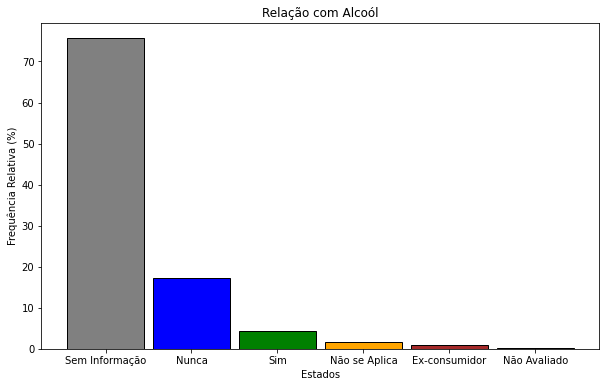

In [16]:
plt.figure(figsize=(10,6))
labels=['Sem Informação', 'Nunca', 'Sim', 'Não se Aplica', 'Ex-consumidor','Não Avaliado']
cores=['gray', 'blue', 'green', 'orange', 'brown', 'yellow']
width_n=0.9
plt.bar(labels, d_alcool*100, width=width_n, color=cores,edgecolor='black')
plt.title('Relação com Alcoól')
plt.xlabel('Estados')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Relação com Consumo de Tabaco

In [17]:
d_tabaco=dadost['TABAGISM'].value_counts(True)
d_tabaco

9    0.731664
1    0.150268
3    0.089445
8    0.016100
2    0.010733
4    0.001789
Name: TABAGISM, dtype: float64

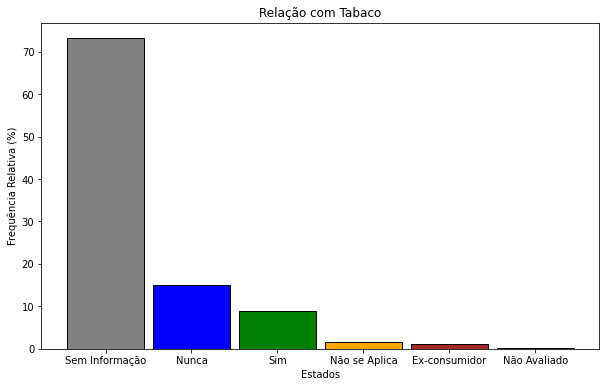

In [18]:
plt.figure(figsize=(10,6))
labels=['Sem Informação', 'Nunca', 'Sim', 'Não se Aplica', 'Ex-consumidor','Não Avaliado']
cores=['gray', 'blue', 'green', 'orange', 'brown', 'yellow']
width_n=0.9
plt.bar(labels, d_tabaco*100, width=width_n, color=cores,edgecolor='black')
plt.title('Relação com Tabaco')
plt.xlabel('Estados')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Análise dos Estados

### Local De Nascimento

In [19]:
c=0
for i in range(0,len(dadost)):
    if dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]=='RS' or dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]=='PR' or dadost.iloc[i,dadost.columns.get_loc('LOCALNAS')]=='SC':
        c+=1
print(f'Ocorrências na região Sul correspondem a {c/len(dadost)*100:.2f}% do Total')    

Ocorrências na região Sul correspondem a 56.17% do Total


In [20]:
d_nasci=dadost['LOCALNAS'].value_counts()
d_nasci

RS          429
RJ          226
PR          107
SC           92
MG           87
Sem Info     56
BA           23
ES           22
PE           16
PB           15
SP           11
CE           10
PA            6
RN            4
AL            3
MT            3
MA            2
GO            2
RO            2
DF            1
SE            1
Name: LOCALNAS, dtype: int64

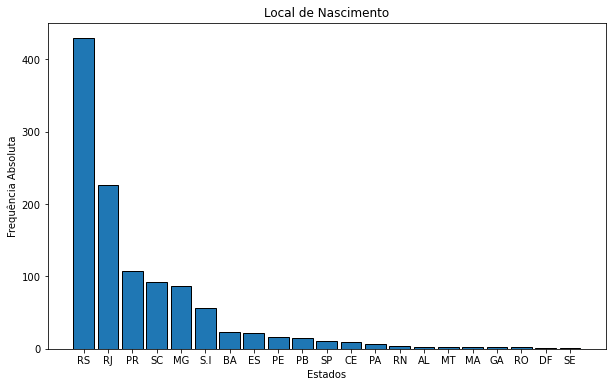

In [21]:
plt.figure(figsize=(10,6))
nome=['RS','RJ','PR','SC','MG','S.I','BA','ES','PE','PB','SP','CE','PA','RN','AL','MT','MA','GA','RO','DF','SE']
width_n=0.85
plt.bar(nome, d_nasci, width=width_n,edgecolor='black')
plt.title('Local de Nascimento')
plt.xlabel('Estados')
plt.ylabel('Frequência Absoluta')
plt.show()

### Local de Residência

In [22]:
d_resid=dadost['ESTADRES'].value_counts()
d_resid

RS          431
RJ          337
PR          112
Sem Info     80
MG           68
SC           38
RO           25
BA           18
AL            3
PA            3
PB            1
PE            1
SP            1
Name: ESTADRES, dtype: int64

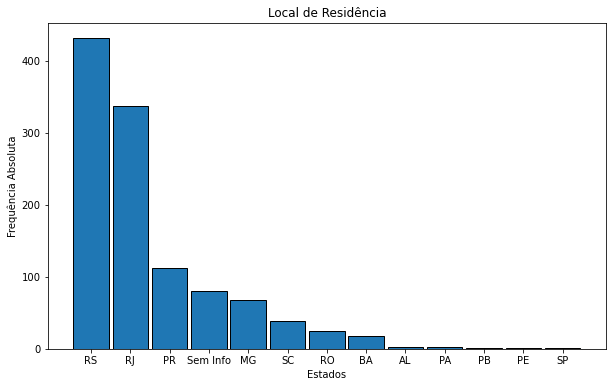

In [23]:
plt.figure(figsize=(10,6))
nome=['RS','RJ','PR','Sem Info','MG','SC','RO','BA','AL','PA','PB','PE','SP']
width_n=0.9
plt.bar(nome, d_resid, width=width_n,edgecolor='black')
plt.title('Local de Residência')
plt.xlabel('Estados')
plt.ylabel('Frequência Absoluta')
plt.show()

### Localização do Hospital

In [24]:
d_loc_hosp=dadost['UFUH'].value_counts()
d_loc_hosp

RS    433
RJ    353
SC    123
PR     90
MG     60
BA     28
RO     25
PA      3
AL      2
PB      1
Name: UFUH, dtype: int64

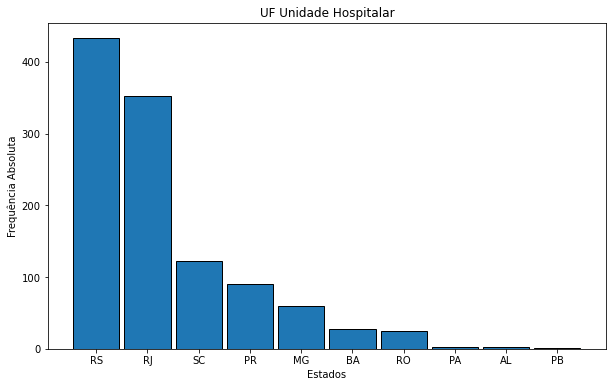

In [25]:
plt.figure(figsize=(10,6))
nome=['RS','RJ','SC','PR','MG','BA','RO','PA','AL','PB']
width_n=0.9
plt.bar(nome, d_loc_hosp, width=width_n,edgecolor='black')
plt.title('UF Unidade Hospitalar')
plt.xlabel('Estados')
plt.ylabel('Frequência Absoluta')
plt.show()

## Diagnósticos e Tratamentos

In [26]:
d_diag=dadost['DIAGANT'].value_counts(True)
d_diag

1    0.401610
2    0.398927
3    0.164580
9    0.032200
4    0.002683
Name: DIAGANT, dtype: float64

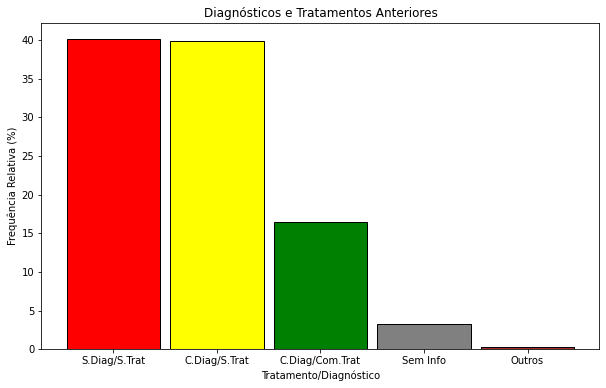

In [27]:
plt.figure(figsize=(10,6))
labels=['S.Diag/S.Trat', 'C.Diag/S.Trat', 'C.Diag/Com.Trat', 'Sem Info', 'Outros']
cores=['red', 'yellow', 'green', 'gray', 'brown']
width_n=0.9
plt.bar(labels, d_diag*100, width=width_n, color=cores,edgecolor='black')
plt.title('Diagnósticos e Tratamentos Anteriores')
plt.xlabel('Tratamento/Diagnóstico')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Encaminhamento

In [28]:
d_enc=dadost['ORIENC'].value_counts(True)
d_enc

1    0.481216
9    0.442755
2    0.060823
3    0.015206
Name: ORIENC, dtype: float64

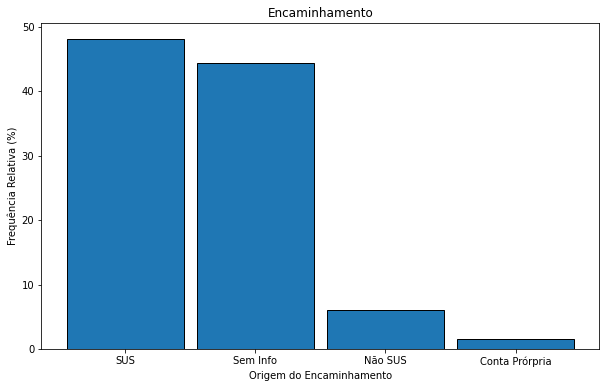

In [29]:
plt.figure(figsize=(10,6))
labels=['SUS','Sem Info','Não SUS','Conta Prórpria']
width_n=0.9
plt.bar(labels, d_enc*100, width=width_n,edgecolor='black')
plt.title('Encaminhamento')
plt.xlabel('Origem do Encaminhamento')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Histórico Familiar

In [30]:
d_hist_fam=dadost['HISTFAMC'].value_counts(True)
d_hist_fam

9    0.818426
2    0.098390
1    0.083184
Name: HISTFAMC, dtype: float64

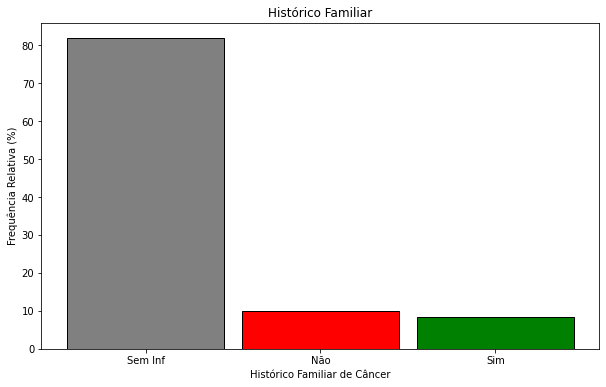

In [31]:
plt.figure(figsize=(10,6))
labels=['Sem Inf','Não','Sim']
cores=['gray','red','green']
width_n=0.9
plt.bar(labels, d_hist_fam*100, width=width_n, color=cores,edgecolor='black')
plt.title('Histórico Familiar')
plt.xlabel('Histórico Familiar de Câncer')
plt.ylabel('Frequência Relativa (%)')
plt.show()

In [32]:
pd.crosstab(dadost['LOCALNAS'], dadost['HISTFAMC'], normalize='columns')

HISTFAMC,1,2,9
LOCALNAS,,,
AL,0.000000,0.018182,0.001093
BA,0.021505,0.027273,0.019672
CE,0.000000,0.018182,0.008743
DF,0.000000,0.000000,0.001093
ES,0.064516,0.009091,0.016393
GO,0.010753,0.000000,0.001093
MA,0.000000,0.000000,0.002186
MG,0.086022,0.118182,0.072131
MT,0.010753,0.000000,0.002186


## Idade 

In [33]:
d_idade=dadost['IDADE']
range_idade=np.arange(0,90,5)

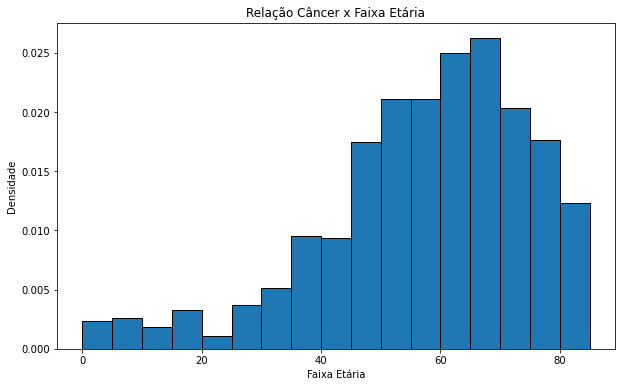

In [34]:
plt.figure(figsize=(10,6))
plt.hist(d_idade, bins=range_idade, edgecolor='black',density=True)
plt.title('Relação Câncer x Faixa Etária')
plt.ylabel('Densidade')
plt.xlabel('Faixa Etária')
plt.show()

## Ocorrência do tumor primário

In [35]:
d_tprim=dadost['MAISUMTU'].value_counts(True)
d_tprim

1    0.662791
9    0.303220
2    0.030411
3    0.003578
Name: MAISUMTU, dtype: float64

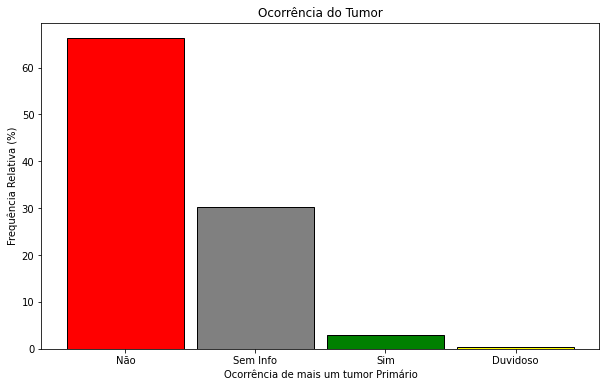

In [36]:
plt.figure(figsize=(10,6))
labels=['Não','Sem Info','Sim','Duvidoso']
cores=['red','gray','green','yellow']
width_n=0.9
plt.bar(labels, d_tprim*100, width=width_n, color=cores,edgecolor='black')
plt.title('Ocorrência do Tumor')
plt.xlabel('Ocorrência de mais um tumor Primário')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Raça/Cor

In [37]:
d_racacor=dadost['RACACOR'].value_counts(True)
d_racacor

1    0.736136
4    0.129696
9    0.089445
2    0.042934
3    0.001789
Name: RACACOR, dtype: float64

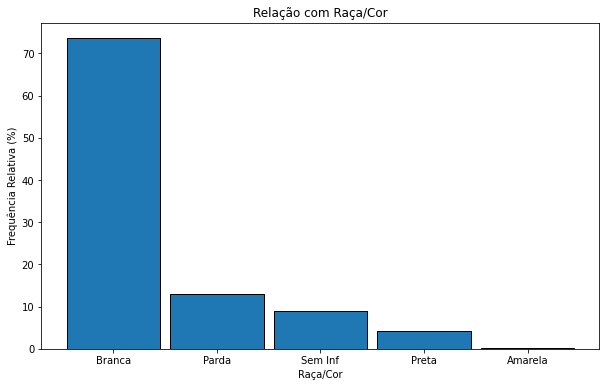

In [38]:
plt.figure(figsize=(10,6))
labels=['Branca','Parda','Sem Inf','Preta','Amarela']
width_n=0.9
plt.bar(labels, d_racacor*100, width=width_n,edgecolor='black')
plt.title('Relação com Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Sexo

In [39]:
d_sexo=dadost['SEXO'].value_counts(True)
d_sexo

2    0.557245
1    0.441860
3    0.000894
Name: SEXO, dtype: float64

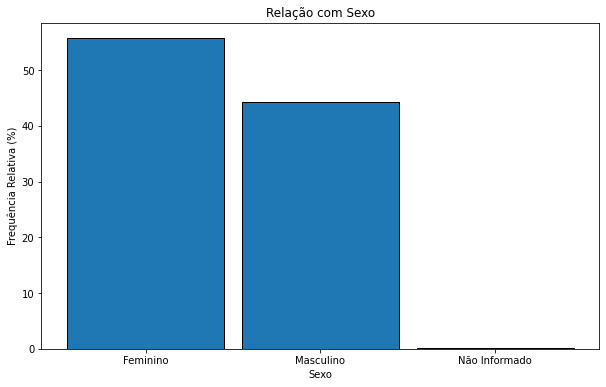

In [40]:
plt.figure(figsize=(10,6))
labels=['Feminino','Masculino','Não Informado']
width_n=0.9
plt.bar(labels, d_sexo*100, width=width_n,edgecolor='black')
plt.title('Relação com Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Escolaridade

In [41]:
d_esc=dadost['INSTRUC'].value_counts(True)
d_esc

9    0.441860
2    0.300537
3    0.101073
1    0.054562
4    0.054562
6    0.045617
5    0.001789
Name: INSTRUC, dtype: float64

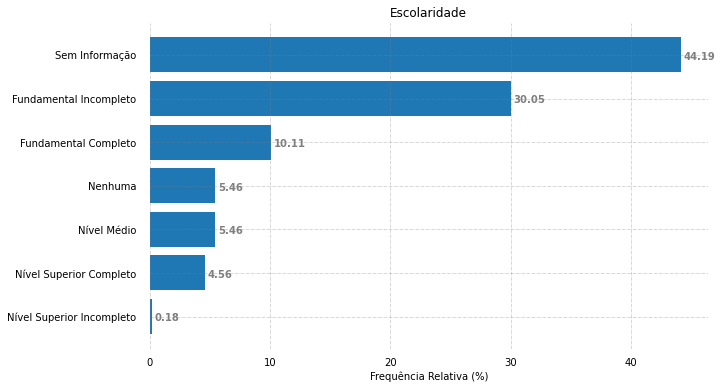

In [42]:
fig, ax = plt.subplots(figsize =(10, 6))
labels=['Sem Informação', 'Fundamental Incompleto','Fundamental Completo','Nenhuma','Nível Médio','Nível Superior Completo',
        'Nível Superior Incompleto']
ax.barh(labels, d_esc*100)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('Escolaridade',
             loc ='center')
plt.xlabel('Frequência Relativa (%)')
plt.show()

In [43]:
pd.crosstab(dadost['LOCALNAS'], dadost['INSTRUC'], normalize='columns')

INSTRUC,1,2,3,4,5,6,9
LOCALNAS,,,,,,,
AL,0.000000,0.005952,0.000000,0.000000,0.0,0.019608,0.000000
BA,0.032787,0.020833,0.000000,0.049180,0.0,0.117647,0.010121
CE,0.032787,0.008929,0.017699,0.032787,0.0,0.000000,0.002024
DF,0.000000,0.000000,0.008850,0.000000,0.0,0.000000,0.000000
ES,0.032787,0.035714,0.000000,0.016393,0.0,0.000000,0.014170
GO,0.000000,0.002976,0.000000,0.000000,0.0,0.000000,0.002024
MA,0.000000,0.005952,0.000000,0.000000,0.0,0.000000,0.000000
MG,0.098361,0.050595,0.053097,0.000000,0.0,0.117647,0.105263
MT,0.000000,0.005952,0.000000,0.000000,0.0,0.000000,0.002024


# Analisando Apenas o Rio Grande do Sul (RS)

In [44]:
dados_rs=dadost[dadost['LOCALNAS']=='RS']
dados_rs

,ALCOOLIS,ANOPRIDI,ANTRI,BASDIAGSP,BASMAIMP,CLIATEN,CLITRAT,CNES,DATAINITRT,DATAOBITO,...,PTNM,RACACOR,RZNTR,SEXO,TABAGISM,TIPOHIST,TNM,TPCASO,UFUH,VALOR_TOT
306,1,2006,2006.0,3,7,3,31,2246988,13/12/2006,Sem Info,...,888,1,8,1,3,8070/3,300,1,RS,1
514,9,2010,NaN,3,7,9,9,6048692,16/03/2010,02/05/2010,...,999,1,8,1,9,8900/3,999,1,SC,1
520,9,2009,NaN,3,7,24,12,2262274,08/02/2010,13/09/2010,...,999,1,8,1,9,8070/3,888,1,RS,1
521,9,2010,NaN,3,7,24,23,2262274,08/06/2010,Sem Info,...,888,1,8,2,9,8140/3,999,1,RS,1
522,9,2010,NaN,3,7,24,33,2262274,05/08/2010,Sem Info,...,999,1,8,2,9,8010/3,888,1,RS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,9,2019,2020.0,2,3,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,2,9,8000/3,300,1,RS,1
1118,1,2019,2020.0,3,7,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,2,3,8140/3,400,1,RS,1
1119,9,2019,2020.0,2,3,24,24,2232995,09/03/2020,Sem Info,...,888,1,8,1,9,8000/3,100,1,RS,1
1120,9,2020,2020.0,3,7,24,24,2232995,09/03/2020,Sem Info,...,888,2,8,1,9,8010/3,400,1,RS,1


In [45]:
dados_rs.shape[0]

429

## Municípios RS

In [46]:
d_muni_rs=dados_rs['PROCEDEN'].value_counts().head(10)
d_muni_rs

4314902    149
4315602     33
4304705     30
4323002     25
4309209     18
4304606     16
4303103     13
4300604     12
4319901     10
4314050      6
Name: PROCEDEN, dtype: int64

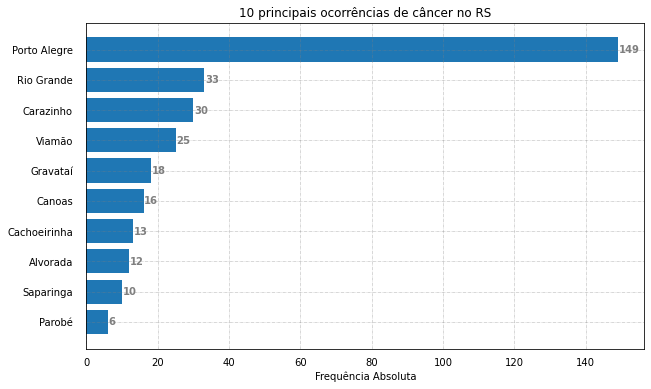

In [47]:
fig, ax = plt.subplots(figsize =(10, 6))
labels=['Porto Alegre', 'Rio Grande','Carazinho','Viamão','Gravataí','Canoas','Cachoeirinha','Alvorada','Saparinga','Parobé']
ax.barh(labels, d_muni_rs)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('10 principais ocorrências de câncer no RS',
             loc ='center')
plt.xlabel('Frequência Absoluta')
plt.show()

## Idade RS

In [48]:
range_idade=np.arange(0,90,5)

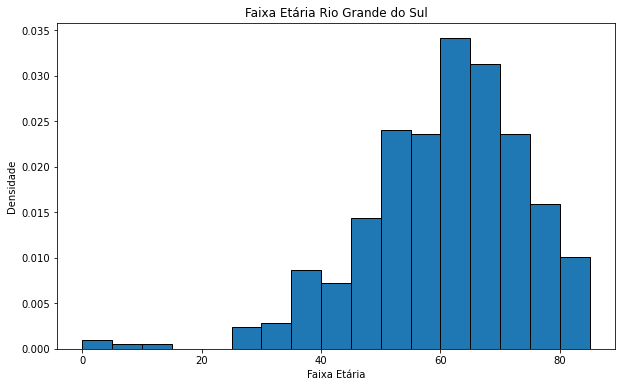

In [49]:
plt.figure(figsize=(10,6))
plt.hist(dados_rs['IDADE'], bins=range_idade, edgecolor='black',density=True)
plt.title('Faixa Etária Rio Grande do Sul')
plt.ylabel('Densidade')
plt.xlabel('Faixa Etária')
plt.show()

In [50]:
dados_rs['IDADE'].describe()

count    429.000000
mean      61.039627
std       14.047676
min        2.000000
25%       52.000000
50%       62.000000
75%       70.000000
max       90.000000
Name: IDADE, dtype: float64

In [51]:
print(f'A média das idades no RS é de 61 anos')

A média das idades no RS é de 61 anos


## Sexo RS

In [52]:
dados_rs['SEXO'].value_counts(True)

2    0.601399
1    0.398601
Name: SEXO, dtype: float64

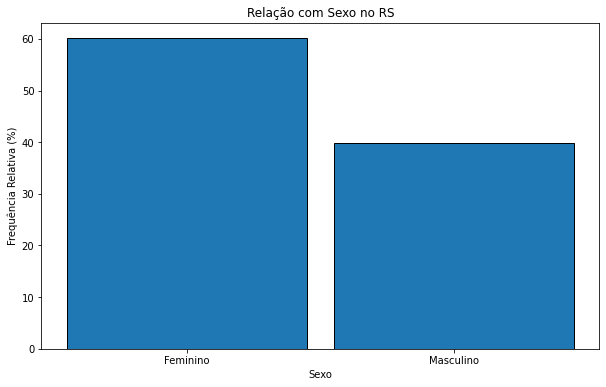

In [53]:
plt.figure(figsize=(10,6))
labels=['Feminino','Masculino']
width_n=0.9
plt.bar(labels, dados_rs['SEXO'].value_counts(True)*100, width=width_n,edgecolor='black')
plt.title('Relação com Sexo no RS')
plt.xlabel('Sexo')
plt.ylabel('Frequência Relativa (%)')
plt.show()

## Escolaridade RS

In [54]:
dados_rs['INSTRUC'].value_counts(True)

9    0.738928
2    0.146853
3    0.039627
6    0.032634
4    0.030303
1    0.006993
5    0.004662
Name: INSTRUC, dtype: float64

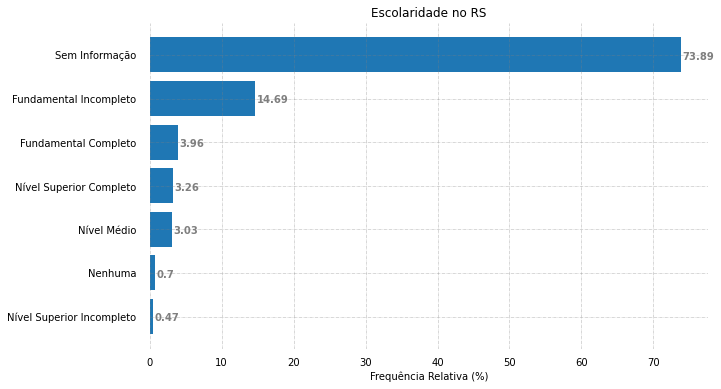

In [55]:
fig, ax = plt.subplots(figsize =(10, 6))
labels=['Sem Informação', 'Fundamental Incompleto','Fundamental Completo','Nível Superior Completo','Nível Médio','Nenhuma',
       'Nível Superior Incompleto']
ax.barh(labels, dados_rs['INSTRUC'].value_counts(True)*100)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('Escolaridade no RS',
             loc ='center')
plt.xlabel('Frequência Relativa (%)')
plt.show()

In [56]:
dados_rs['DIAGANT'].value_counts(True)

2    0.445221
1    0.377622
3    0.153846
9    0.023310
Name: DIAGANT, dtype: float64

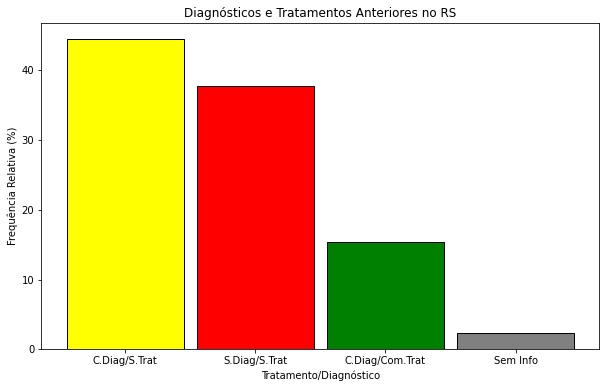

In [57]:
plt.figure(figsize=(10,6))
labels=['C.Diag/S.Trat', 'S.Diag/S.Trat', 'C.Diag/Com.Trat', 'Sem Info']
cores=['yellow', 'red', 'green', 'gray']
width_n=0.9
plt.bar(labels, dados_rs['DIAGANT'].value_counts(True)*100, width=width_n, color=cores,edgecolor='black')
plt.title('Diagnósticos e Tratamentos Anteriores no RS')
plt.xlabel('Tratamento/Diagnóstico')
plt.ylabel('Frequência Relativa (%)')
plt.show()

In [58]:
dados_rs['ORIENC'].value_counts()

9    290
1    138
2      1
Name: ORIENC, dtype: int64